In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coil = 450063


B4 = pd.read_csv(f"../../Documents/Arcellor_Mittal_project/CleanedData/{coil}B4.csv")
B5 = pd.read_csv(f"../../Documents/Arcellor_Mittal_project/CleanedData/{coil}B5.csv")

In [3]:
B4.rename(columns = {'Values':'B4_Values'}, inplace = True)
B5.rename(columns = {'Values':'B5_Values'}, inplace = True)


B4 = B4[B4.Lengthpoints >= 140]
B5 = B5[B5.Lengthpoints >= 140]

B4 = B4[B4.Lengthpoints <= 170]
B5 = B5[B5.Lengthpoints <= 170]

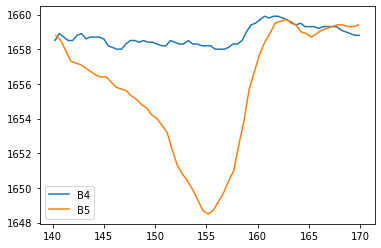

In [4]:
plt.plot(B4.Lengthpoints,B4.B4_Values)
plt.plot(B5.Lengthpoints,B5.B5_Values)
plt.legend(['B4','B5'])
plt.show()

In [5]:
index = 0
B4_array = B4['Lengthpoints'].to_numpy()
B5_array = B5['Lengthpoints'].to_numpy()

for lengthpoint in B5.Lengthpoints:
    closest = np.abs(B4_array-lengthpoint).argmin()
    closest_element = B4_array[closest]
    
    B5_array[index] = closest_element
    index+=1
B5.Lengthpoints = B5_array 

In [6]:
merged_df = pd.merge(B4,B5, how= 'left')
merged_df['difference'] = merged_df['B5_Values']-merged_df['B4_Values']
merged_df.fillna(method ='bfill', inplace = True)
merged_df.fillna(method ='pad', inplace = True)

pd.set_option('display.max_rows', None)
merged_df

,Lengthpoints,B4_Values,B5_Values,difference
0,140.2349,1658.5,1658.8,0.3
1,140.6656,1658.9,1658.5,-0.4
2,141.0965,1658.7,1657.9,-0.8
3,141.5277,1658.5,1657.3,-1.2
4,141.9591,1658.5,1657.3,-1.2
5,142.3906,1658.8,1657.2,-1.6
6,142.8221,1658.9,1657.1,-1.8
7,143.2542,1658.6,1656.9,-1.7
8,143.6863,1658.7,1656.7,-2.0
9,144.1185,1658.7,1656.5,-2.2
